In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
## function to skip printing of max_iter warnings

import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
plt.style.use("Solarize_Light2")

In [2]:
churn_data = pd.read_csv('/home/elliot/PycharmProjects/CSC 495 - Telecom Customer Churn/Datasets/telecom_churn_Processed.csv')

X = churn_data.drop('Churn', axis=1)
X = X.drop("Unnamed: 0", axis=1)
y = churn_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)

In [3]:
gauss_NB = GaussianNB()
gauss_NB.fit(X_train, y_train)

y_pred_GNB = gauss_NB.predict(X_test)
y_pred_train_GNB = gauss_NB.predict(X_train)

gnb_as = metrics.accuracy_score(y_test, y_pred_GNB)
gnb_as_train = metrics.accuracy_score(y_train, y_pred_train_GNB)

print(f"Accuracy score for test data : {gnb_as}")
print(f"Accuracy score for train data : {gnb_as_train}")


Accuracy score for test data : 0.6902197328737613
Accuracy score for train data : 0.699426873275313


<AxesSubplot:>

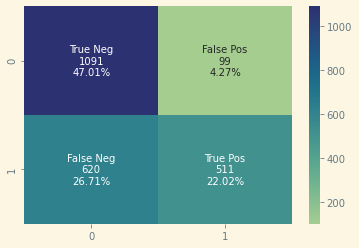

In [4]:
cf_matrix = metrics.confusion_matrix(y_pred_GNB, y_test)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = [f"{value}" for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='crest')

In [5]:
print(metrics.classification_report(y_test, y_pred_GNB))

              precision    recall  f1-score   support

           0       0.92      0.64      0.75      1711
           1       0.45      0.84      0.59       610

    accuracy                           0.69      2321
   macro avg       0.68      0.74      0.67      2321
weighted avg       0.79      0.69      0.71      2321



In [6]:
k = 5
kf = KFold(n_splits=k, random_state=None)

result = cross_val_score(gauss_NB , X,y, cv = kf)
mean = round(result.mean()*100, 2)
stdv = round(result.std()*100, 2)
range = [round(mean-stdv, 2), round(mean+stdv ,2)]

print("Avg accuracy: {}% +/- {}%\n range: {}".format(mean, stdv, range))






Avg accuracy: 69.41% +/- 0.97%
 range: [68.44, 70.38]
